**Lázaro R. Díaz Lievano.**
# Reto 1: Boxplots
1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
### 2. Desarrollo:

#### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [4]:
# Tu código va aquí
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import json

##BOXPLOT PARA EL DATAFRAME DE LA NASA

In [7]:
df=pd.read_csv("/content/drive/MyDrive/BEDU_DS/FASE_3/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv", index_col=0 ) 
df.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


### Distribución de los diametros estimados de los meteoritos.

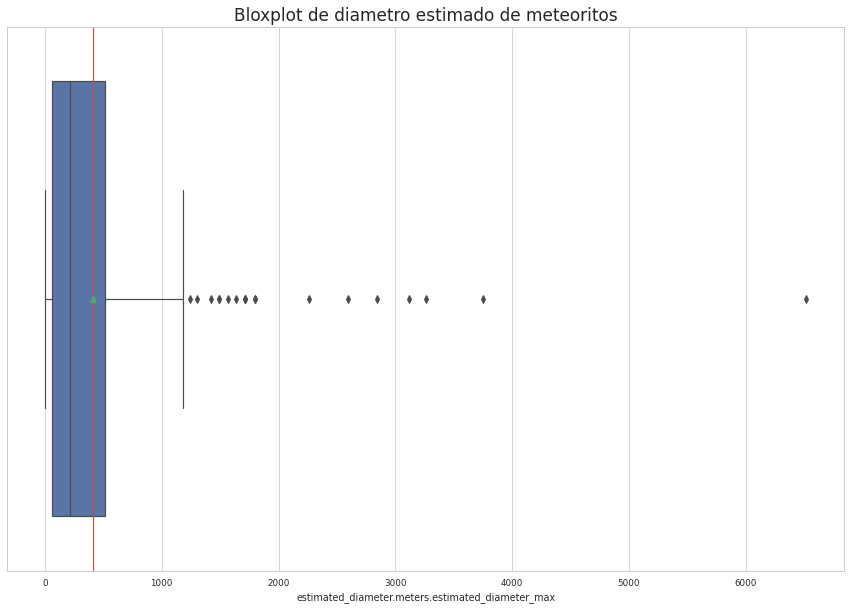

In [8]:
sns.set(context = "paper", style="whitegrid")
plt.figure(figsize=(15,10)) #tama;o imagen
sns.boxplot(x=df['estimated_diameter.meters.estimated_diameter_max'], showmeans=True)
df["estimated_diameter.meters.estimated_diameter_max"].median(), df["estimated_diameter.meters.estimated_diameter_max"].mean()
plt.title("Bloxplot de diametro estimado de meteoritos", fontsize =17)
plt.axvline(x=df["estimated_diameter.meters.estimated_diameter_max"].mean(), c="r")
#plt.savefig("figura.png") #guardar imagen 

### Distribución de la velocidad relativa de los meteoritos en km/s

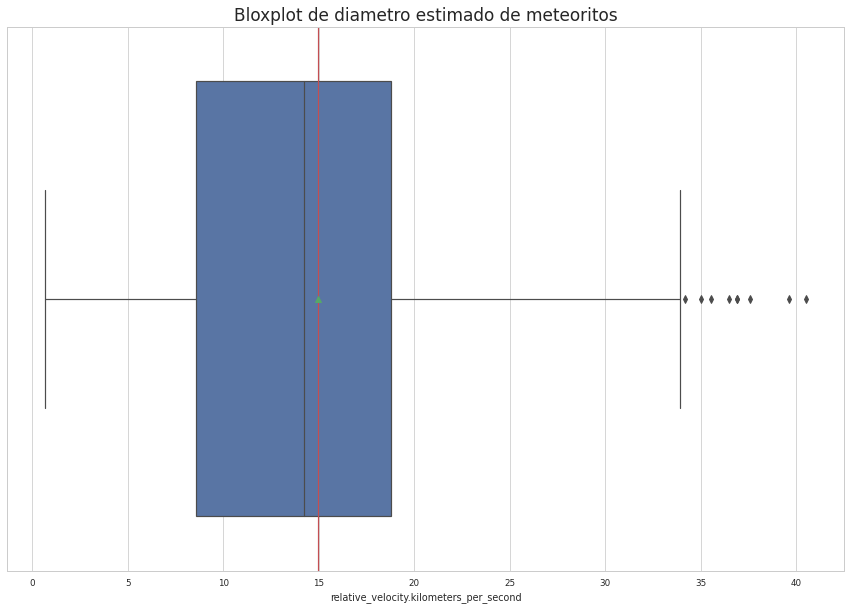

In [9]:
rel=df["relative_velocity.kilometers_per_second"]
sns.set(context = "paper", style="whitegrid")
plt.figure(figsize=(15,10)) #tama;o imagen
sns.boxplot(x=rel, showmeans=True)
rel.median(), rel.mean()
plt.title("Bloxplot de diametro estimado de meteoritos", fontsize =17)
plt.axvline(x=rel.mean(), c="r")
#plt.savefig("figura.png") #guardar imagen 

##BOXPLOT MELBOURNE HOUSES 

In [11]:
df_mel=pd.read_csv("/content/drive/MyDrive/BEDU_DS/FASE_3/Remoto Datasets/Remoto melbourne_housing-clean.csv", index_col=0)
df_mel.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Distribución de los precios de las casas de Melbourne.

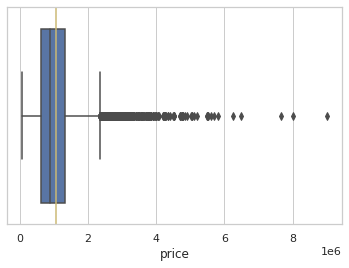

In [12]:
sns.set(style="whitegrid")
sns.boxplot(x=df_mel['price'])
plt.axvline(df_mel['price'].mean(), c='y') 

Vemos que este conjunto de datos tiene demasiados valores atipicos en sus precios, por lo que es conveniente limpiarlo un poco para obtener un rango de precios mas razonable. 

###Distribución del tamaño de los terrenos de Melbourne. 

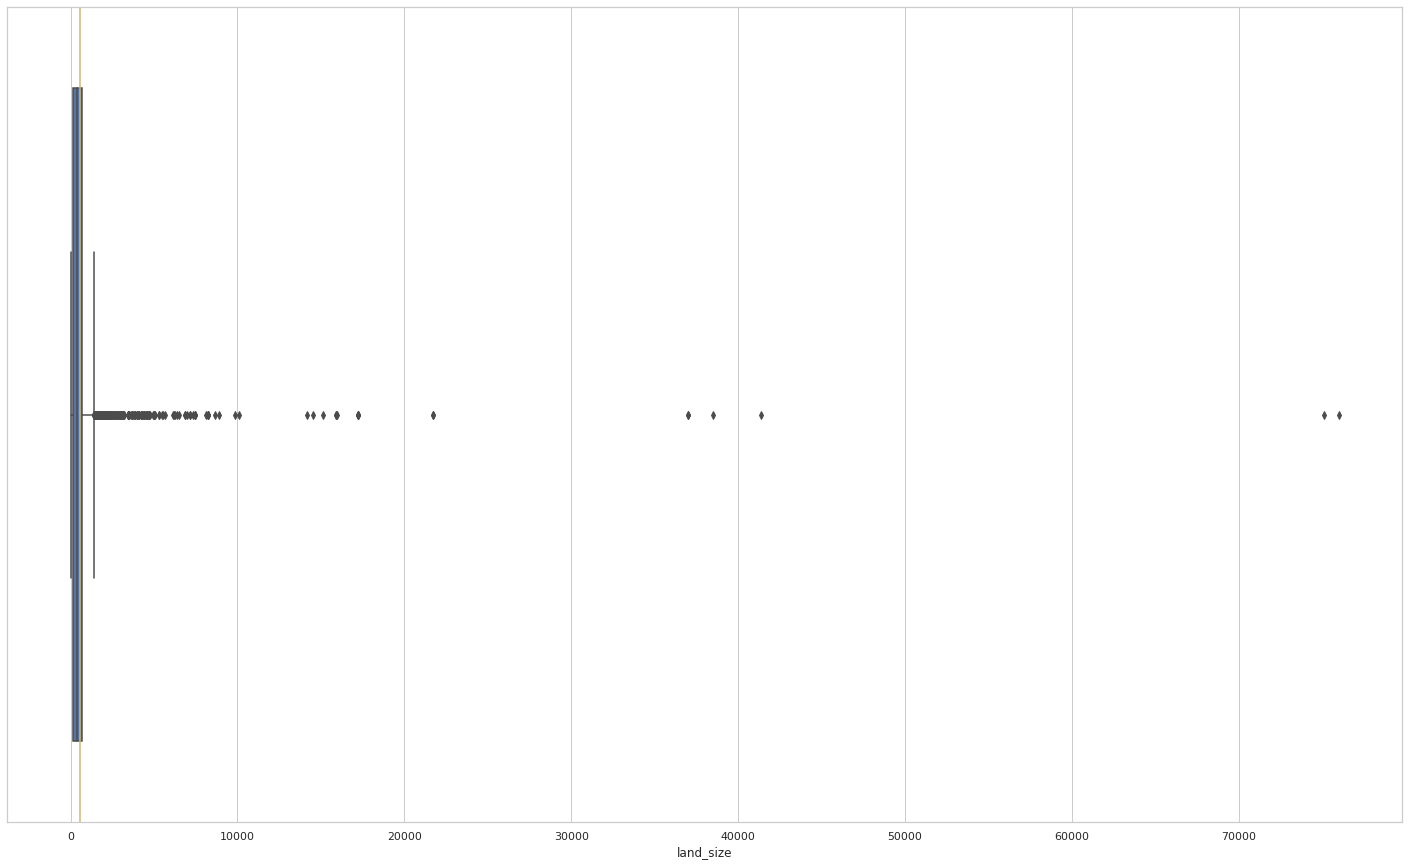

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,15))
sns.boxplot(x=df_mel['land_size'])
plt.axvline(df_mel['land_size'].mean(), c='y')

##BOXPLOTS DE DATAFRAME NEW YORK TIMES BESTSELLERS 

In [14]:
import json
ny=open("/content/drive/MyDrive/BEDU_DS/FASE_3/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json", "r" ) 
ny_json=json.load(ny)
ny.close()


In [15]:
df_ny=pd.DataFrame.from_dict(ny_json)
df_ny

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,http://www.amazon.com/Six-Years-Harlan-Coben/d...,Harlan Coben,Jake Fisher discovers that neither the woman h...,Dutton,SIX YEARS,5b4aa4ead3089013507dc593,1366416000000,1367712000000,9,8,5,27.95
3029,http://www.amazon.com/The-Interestings-Novel-M...,Meg Wolitzer,Six friends meet in the 1970s at a summer arts...,Riverhead,THE INTERESTINGS,5b4aa4ead3089013507dc595,1366416000000,1367712000000,11,11,2,27.95
3030,http://www.amazon.com/Man-Without-Breath-Berni...,Philip Kerr,"Bernie Gunther, the Berlin cop, is sent to Smo...",Marian Wood/Putnam,A MAN WITHOUT BREATH,5b4aa4ead3089013507dc597,1366416000000,1367712000000,13,0,1,26.95
3031,http://www.amazon.com/The-Storyteller-Jodi-Pic...,Jodi Picoult,A New Hampshire baker finds herself in the mid...,Emily Bestler/Atria,THE STORYTELLER,5b4aa4ead3089013507dc598,1366416000000,1367712000000,14,10,8,28.99


###Distribución de los precios de los libros bestsellers.

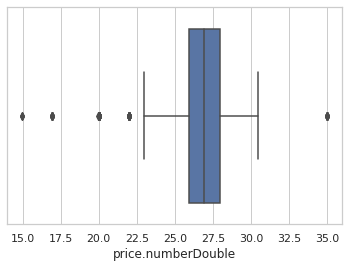

In [16]:
sns.boxplot(x=df_ny["price.numberDouble"])

#ELIMINANDO LOS OUTLIERS

#### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

##Eliminamos los valores atipicos de la variable de diametro estimado del meteorito del dataframe de la NASA.

In [17]:
edm=df_nasa["estimated_diameter.meters.estimated_diameter_max"]
iqr = edm.quantile(0.75) - edm.quantile(0.25)
filtro_inferior = edm > edm.quantile(0.25) - (iqr * 1.5)
filtro_superior = edm < edm.quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


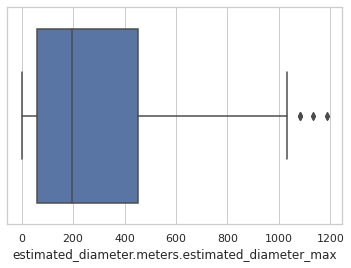

In [18]:
sns.boxplot(df_filtrado["estimated_diameter.meters.estimated_diameter_max"])

##Eliminamos los valores atipicos de la columna Land size del df de Melbourne.

In [23]:
land=df_mel["land_size"]
iqr = land.quantile(0.75) - land.quantile(0.25)
filtro_inferior = land > land.quantile(0.25) - (iqr * 1.5)
filtro_superior = land < land.quantile(0.75) + (iqr * 1.5)

df_filtrado = df_mel[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


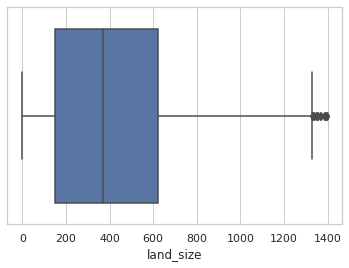

In [24]:
sns.boxplot(df_filtrado["land_size"])